In [3]:
import cv2
import numpy as np
import random
import numpy as np
from PIL import Image
import webcolors
from time import time
import pandas as pd

from metrics.edge_metrics import get_ods_ap

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from datasets import load_dataset
import datasets
from pathlib import Path

datasets.config.DOWNLOADED_DATASETS_PATH = Path('/shared_drive/user-files/huggingface/datasets/downloads')
datasets.config.HF_DATASETS_CACHE = Path('/shared_drive/user-files/huggingface/datasets/cache')

dataset = load_dataset('fusing/fill50k')

In [66]:
# Function to get the name of the color
def get_colors_with_names(colors_names, colors):
    rgb_tuple = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    try:
        color_name = webcolors.rgb_to_name(rgb_tuple)
    except ValueError:
        color_name = "Unknown"

    if color_name != "Unknown" and rgb_tuple != (255, 255, 255) and rgb_tuple != (0, 0, 0):
        # print('add color')
        colors_names.append(color_name)
        colors.append(rgb_tuple)

    return colors_names, colors

In [67]:
colors_in_circle_names = []
colors_in_circle_colors = []

t = time()
while len(colors_in_circle_names) < 100:
    colors_in_circle_names, colors_in_circle_colors = get_colors_with_names(colors_in_circle_names, colors_in_circle_colors)

time() - t

169.0435483455658

In [72]:
colors_out_circle_names = []
colors_out_circle_colors = []

t = time()
while len(colors_out_circle_names) < 100:
    colors_out_circle_names, colors_out_circle_colors = get_colors_with_names(colors_out_circle_names, colors_out_circle_colors)

time() - t

166.07831501960754

In [73]:
# Create a black background image
width, height = 512, 512  # Adjust the dimensions as needed

df = pd.DataFrame(columns=['text'])

# Generate random circles
num_circles = 1000  # Number of circles to generate
n = 0
for i in range(num_circles):
    if n >= 100:
        break

    center_x = random.randint(0, width - 1)
    center_y = random.randint(0, height - 1)
    radius = random.randint(30, 300)  # Adjust the radius range as needed
    
    background_black = np.zeros((height, width, 3), dtype=np.uint8)

    background_color_name = colors_out_circle_names[n]
    background_color = colors_out_circle_colors[n]
    background_color = np.full((height, width, 3), background_color, dtype=np.uint8)
    # Draw the circle with white contour
    circle_color_name = colors_in_circle_names[n]
    circle_color = colors_in_circle_colors[n]

    cv2.circle(background_black, (center_x, center_y), radius, (255, 255, 255), 3)
    cv2.circle(background_color, (center_x, center_y), radius, circle_color, -1)

    for j in range(len(dataset['train'])):
        train_condition_img = np.array(dataset['train'][j]['conditioning_image'])

        ods, ap = get_ods_ap(img_pred=background_black, img_true=train_condition_img)
    
        # if ap >= 0.05:
        #     print(ap)
        #     print('Same contours!')
            # image_output = Image.fromarray(background)
            # train_condition_img = Image.fromarray(train_condition_img)

            # image_output.save(f"same_contours/pred_image_{n}.png")
            # train_condition_img.save(f"same_contours/true_image_{n}.png")

        if ap < 0.05 and n < 100:
            image_output = Image.fromarray(background_black)
            image_output_target = Image.fromarray(background_color)
            image_output.save(f"test_set/conditioning_image_{n+1}.png")
            image_output_target.save(f"test_set/target_image_{n+1}.png")

            df.loc[n, 'text'] = f"{circle_color_name} circle with {background_color_name} background"
            
            n += 1
            break

df.to_csv('test_set/prompts.csv', index=False)

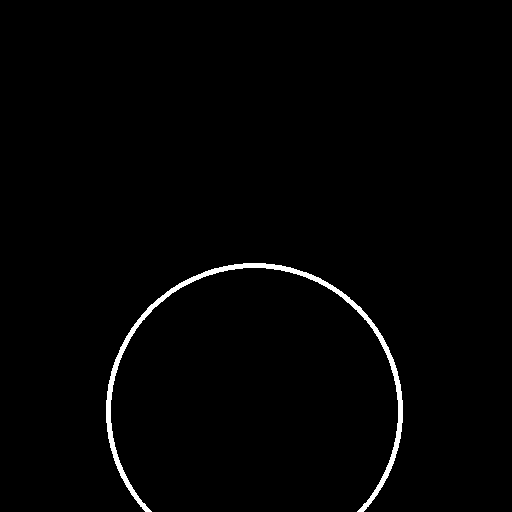

In [25]:
dataset['train'][0]['conditioning_image']

In [4]:
df_prompts = pd.read_csv('test_set/prompts.csv')
validation_prompts = list(df_prompts['text'])

In [6]:
len(validation_prompts)

100

In [5]:
import os

In [6]:
df_prompts = pd.read_csv('test_set/prompts.csv')
validation_prompts = list(df_prompts['text'])

validation_images = os.listdir('test_set/')
validation_images = [f"test_set/{file}" for file in validation_images if 'conditioning_image' in file]

In [10]:
import re
def sort_by_number(file_name):
    match = re.search(r'\d+', file_name)  # Find the first number in the file name
    if match:
        return int(match.group())  # Convert the matched number to an integer
    else:
        return float('inf')  # If no number found, place the file at the end of the list

# Sort the list of file names by the number in their names
sorted_file_names = sorted(validation_images, key=sort_by_number)

In [11]:
sorted_file_names

['test_set/conditioning_image_1.png',
 'test_set/conditioning_image_2.png',
 'test_set/conditioning_image_3.png',
 'test_set/conditioning_image_4.png',
 'test_set/conditioning_image_5.png',
 'test_set/conditioning_image_6.png',
 'test_set/conditioning_image_7.png',
 'test_set/conditioning_image_8.png',
 'test_set/conditioning_image_9.png',
 'test_set/conditioning_image_10.png',
 'test_set/conditioning_image_11.png',
 'test_set/conditioning_image_12.png',
 'test_set/conditioning_image_13.png',
 'test_set/conditioning_image_14.png',
 'test_set/conditioning_image_15.png',
 'test_set/conditioning_image_16.png',
 'test_set/conditioning_image_17.png',
 'test_set/conditioning_image_18.png',
 'test_set/conditioning_image_19.png',
 'test_set/conditioning_image_20.png',
 'test_set/conditioning_image_21.png',
 'test_set/conditioning_image_22.png',
 'test_set/conditioning_image_23.png',
 'test_set/conditioning_image_24.png',
 'test_set/conditioning_image_25.png',
 'test_set/conditioning_image_26.p

In [8]:
sorted(validation_images)

['test_set/conditioning_image_1.png',
 'test_set/conditioning_image_10.png',
 'test_set/conditioning_image_100.png',
 'test_set/conditioning_image_11.png',
 'test_set/conditioning_image_12.png',
 'test_set/conditioning_image_13.png',
 'test_set/conditioning_image_14.png',
 'test_set/conditioning_image_15.png',
 'test_set/conditioning_image_16.png',
 'test_set/conditioning_image_17.png',
 'test_set/conditioning_image_18.png',
 'test_set/conditioning_image_19.png',
 'test_set/conditioning_image_2.png',
 'test_set/conditioning_image_20.png',
 'test_set/conditioning_image_21.png',
 'test_set/conditioning_image_22.png',
 'test_set/conditioning_image_23.png',
 'test_set/conditioning_image_24.png',
 'test_set/conditioning_image_25.png',
 'test_set/conditioning_image_26.png',
 'test_set/conditioning_image_27.png',
 'test_set/conditioning_image_28.png',
 'test_set/conditioning_image_29.png',
 'test_set/conditioning_image_3.png',
 'test_set/conditioning_image_30.png',
 'test_set/conditioning_ima

In [14]:
len(validation_images)

100

In [1]:
1e-5 / 2

5e-06

In [26]:
# import matplotlib.pyplot as plt
# import os

# folder_path = 'fill50k/images'
# image_files = os.listdir(folder_path)[100:125]

# fig, axes = plt.subplots(5, 5, figsize=(6, 6))

# for ax, image_file in zip(axes.flat, image_files):
#     image_path = os.path.join(folder_path, image_file)
#     image = plt.imread(image_path)
#     ax.imshow(image)
#     ax.axis('off')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.show()